In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
data=pd.read_csv("./diabetes.csv")

In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_copy=data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace=True)
data_copy.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [6]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

([<matplotlib.axis.XTick at 0x2208a660cd0>,
 [Text(0, 0, 'No Diabetics'), Text(1, 0, 'Diabetics')])

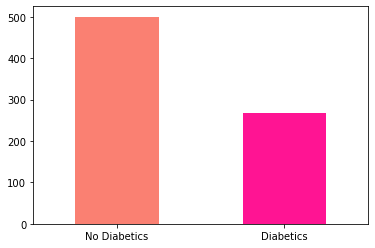

In [7]:
data_copy['Outcome'].value_counts().plot(kind='bar',color=['salmon',"deeppink"])
plt.xticks(np.arange(2), ('No Diabetics','Diabetics'),rotation=0)

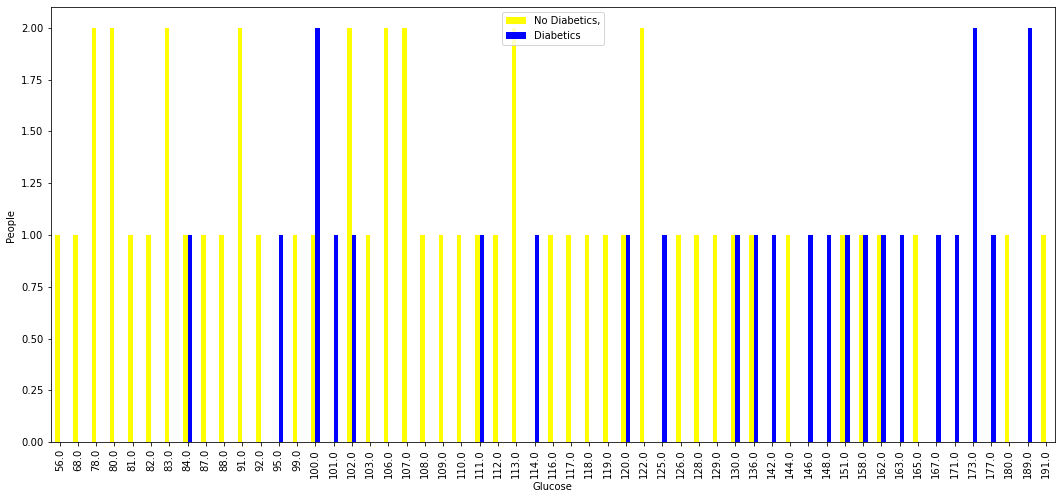

In [8]:
pd.crosstab(data_copy.Glucose[::10],data_copy.Outcome).plot(kind="bar",figsize=(18,8), color=["yellow","blue"])
plt.ylabel("People ")
plt.legend(["No Diabetics,","Diabetics"])

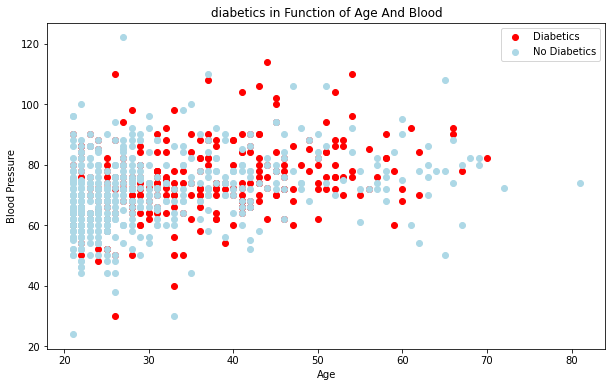

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data_copy.Age[data.Outcome==1],data_copy.BloodPressure[data.Outcome==1],c="red")
plt.scatter(data_copy.Age[data.Outcome==0],data_copy.BloodPressure[data.Outcome==0],c="lightBlue")
plt.title("diabetics in Function of Age And Blood")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetics", "No Diabetics"])

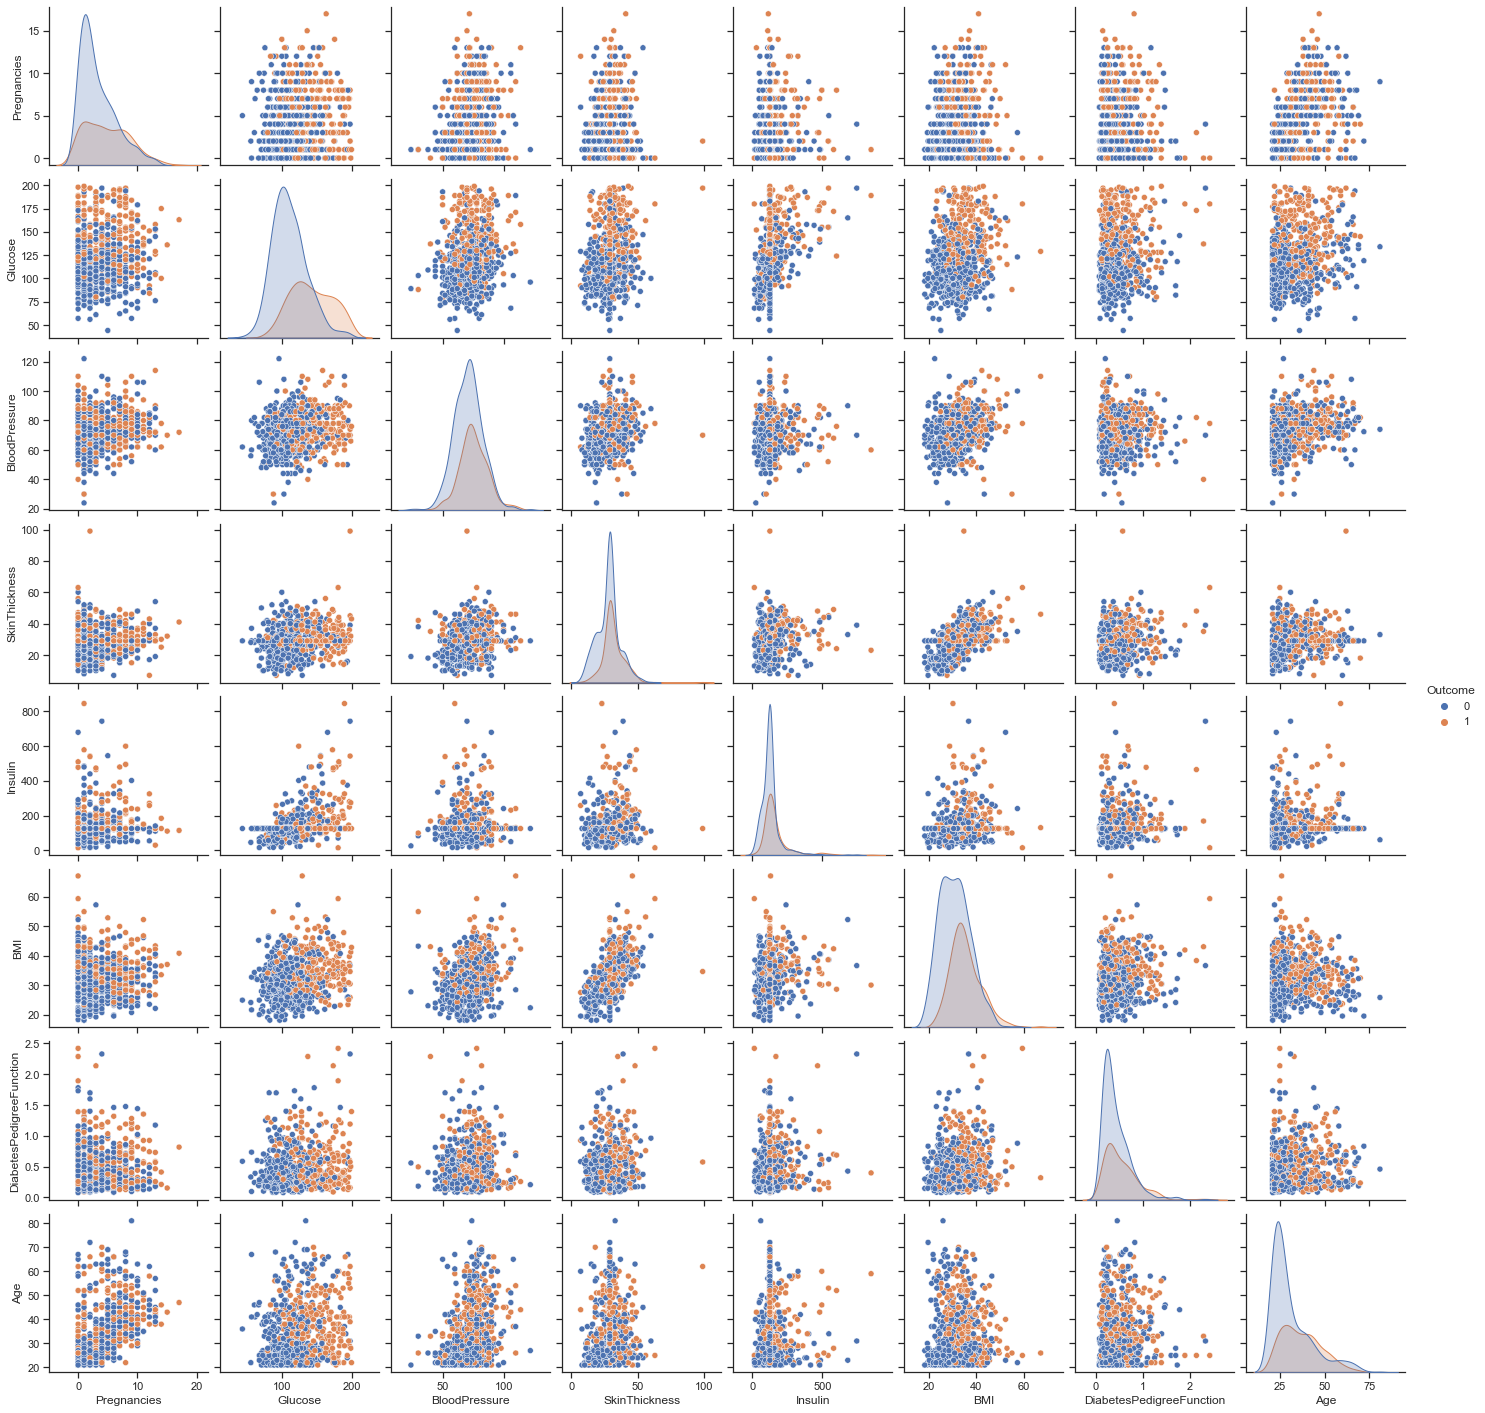

In [10]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(data_copy,hue='Outcome')

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021559  0.231128       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419064  0.231

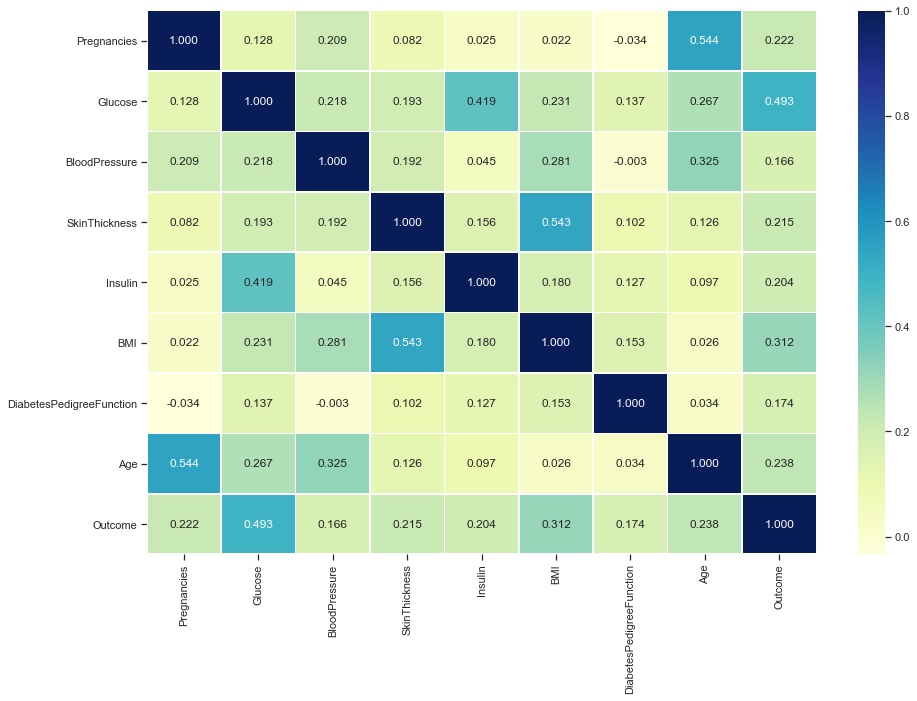

In [11]:
corr_matrix=data_copy.corr()
print(corr_matrix)
fig,ax=plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".3f",cmap="YlGnBu")


In [12]:
data_copy.sample(frac=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
333,12,106.0,80.000000,29.0,125.0,23.6,0.137,44,0
101,1,151.0,60.000000,29.0,125.0,26.1,0.179,22,0
734,2,105.0,75.000000,29.0,125.0,23.3,0.560,53,0
459,9,134.0,74.000000,33.0,60.0,25.9,0.460,81,0
...,...,...,...,...,...,...,...,...,...
287,1,119.0,86.000000,39.0,220.0,45.6,0.808,29,1
193,11,135.0,72.405184,29.0,125.0,52.3,0.578,40,1
507,1,130.0,60.000000,23.0,170.0,28.6,0.692,21,0
448,0,104.0,64.000000,37.0,64.0,33.6,0.510,22,1


In [13]:
X=data_copy.drop("Outcome",axis=1)
y=data_copy["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [23]:


logres=LogisticRegression()
logres.fit(X_train,y_train)
logres.score(X_test,y_test)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8181818181818182

In [15]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knns=knn.score(X_test,y_test)
print(knns)

0.7662337662337663


In [16]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf=clf.score(X_test,y_test)
print(clf)

0.7857142857142857


In [17]:
svm=SVC()
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))




0.7922077922077922


In [18]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test))




C:\Users\deepa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7987012987012987


In [19]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid={'C':np.logspace(-4,4,30),"solver":["liblinear"]}
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)
score1=rs_log_reg.score(X_test,y_test)
print(score1)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8116883116883117


In [20]:
from sklearn.model_selection import GridSearchCV
log_reg_grid={'C':np.logspace(-4,4,5),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
score=gs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
81.16883116883116


In [1]:
import pickle
file=open("diabetics211.pkl",'wb')
pickle.dump(logres, file)

NameError: name 'logres' is not defined

In [24]:
import pickle
file=open("diabeticsxgb.pkl",'wb')
pickle.dump(xgb, file)